# **Loan Default Prediction**



Auteurs: **SAWADOGO Issa**  
         **KPOGNON Koffi**  
         **FOMBA Abdou**  

## 1. Introduction

Les recherches identifient des déterminants multiples du défaut. Les travaux fondateurs de **Altman (1968)** sur les scores Z et de **Becker (1968)** ont souligné l'importance des variables financières et du capital humain. **Djankov et al. (2008)** ont confirmé le rôle crucial de l'endettement et des garanties. Récemment, l'analyse s'est enrichie de facteurs comportementaux et de données non traditionnelles. **Bazarbash et al. (2020)** montrent que les biais comportementaux influencent significativement la probabilité de défaut. **Alvarez et al. (2021)** mettent en évidence l'impact des chocs de liquidité et de l'instabilité professionnelle. **D’Acunto et al. (2022)** analysent le rôle de la littératie financière. **Berg et al. (2022)** démontrent la supériorité prédictive des données de transactions bancaires. Enfin, **Chen et al. (2023)** exploitent l'intelligence artificielle pour identifier de nouveaux facteurs prédictifs à partir de données massives, confirmant la complexité multifactorielle du risque.  
L'objectif de notre étude vise à prédire le risque de défaut à l'aide de plusieurs facteurs explicatifs et en usant des récentes techniques du machine learning.

## 2. Chargement de la base de données et installation de librairies

In [ ]:
# Install gdown
!pip install -q gdown

import gdown
import pandas as pd
import numpy as np


# Google Drive file ID
file_id = "1t7fCjZneSb8yAEiJ3O8OnHgD2MupxVK9"
url = f"https://drive.google.com/uc?id={file_id}"

# Local filename
filename = "Loan_default.csv"

# Download the file
gdown.download(url, filename, quiet=False)

# Read the file into a pandas DataFrame
df = pd.read_csv(filename)

# Display the first few rows of the DataFrame
df.head()

## 3. Exploration de la base de données

#### Vérification des données manquantes de la base et de la typologie des variables

In [ ]:
df.isna().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


*La base de données ne comporte pas de données manquantes*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [ ]:
df.shape

(255347, 18)

*La base initiale est comporte 18 colonnes et 255347 observations*

#### Définition des variables

| Variable | Définition | Valeurs non-nulles | Type de données |
| :--- | :--- | :--- | :--- |
| **LoanID** | Identifiant unique du prêt | 255347 | `object` (chaîne de caractères) |
| **Age** | Âge du demandeur | 255347 | `int64` (entier) |
| **Income** | Revenu annuel du demandeur | 255347 | `int64` (entier) |
| **LoanAmount** | Montant du prêt demandé | 255347 | `int64` (entier) |
| **CreditScore** | Cote de crédit du demandeur | 255347 | `int64` (entier) |
| **MonthsEmployed** | Nombre de mois d'emploi du demandeur | 255347 | `int64` (entier) |
| **NumCreditLines** | Nombre de lignes de crédit ouvertes | 255347 | `int64` (entier) |
| **InterestRate** | Taux d'intérêt du prêt | 255347 | `float64` (décimal) |
| **LoanTerm** | Durée du prêt en mois | 255347 | `int64` (entier) |
| **DTIRatio** | Ratio dette sur revenu | 255347 | `float64` (décimal) |
| **Education** | Niveau d'éducation du demandeur | 255347 | `object` (chaîne de caractères) |
| **EmploymentType** | Type d'emploi du demandeur | 255347 | `object` (chaîne de caractères) |
| **MaritalStatus** | État civil du demandeur | 255347 | `object` (chaîne de caractères) |
| **HasMortgage** | Indicateur de l'existence d'un prêt hypothécaire | 255347 | `object` (chaîne de caractères) |
| **HasDependents** | Indicateur de l'existence de personnes à charge | 255347 | `object` (chaîne de caractères) |
| **LoanPurpose** | Raison de la demande de prêt | 255347 | `object` (chaîne de caractères) |
| **HasCoSigner** | Indicateur de l'existence d'un cosignataire | 255347 | `object` (chaîne de caractères) |
| **Default** | Variable cible : 1 si défaut de paiement, 0 sinon | 255347 | `int64` (entier) |

/tmp/ipython-input-3306417614.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_counts.index, y=default_counts.values, palette='viridis')


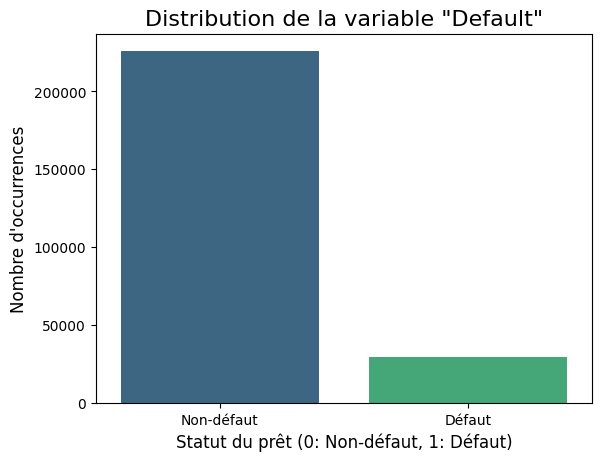

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculer le nombre d'occurrences pour chaque modalité de 'Default'
default_counts = df['Default'].value_counts()

# Créer un graphique à barres avec seaborn
sns.barplot(x=default_counts.index, y=default_counts.values, palette='viridis')

# Ajouter un titre et des étiquettes
plt.title('Distribution de la variable "Default"', fontsize=16)
plt.xlabel('Statut du prêt (0: Non-défaut, 1: Défaut)', fontsize=12)
plt.ylabel('Nombre d\'occurrences', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-défaut', 'Défaut'])

# Afficher le graphique
plt.show()

*On a un dataset déséquilibré, qui permet de tirer des informations sur la suite de l'analyse.*  
*Premièrement, cela nous donne une bonne information sur les bonnes métriques qui seront utilisées dans la suite de l'analyse, à savoir la précision et le recall.*  
*Deuxiemement, lors de la définition du modèle, on va pénaliser le modèle plus durement lors qu'il prédit un non défaut de paiement alors qu'il y avait un défaut de paiement.*

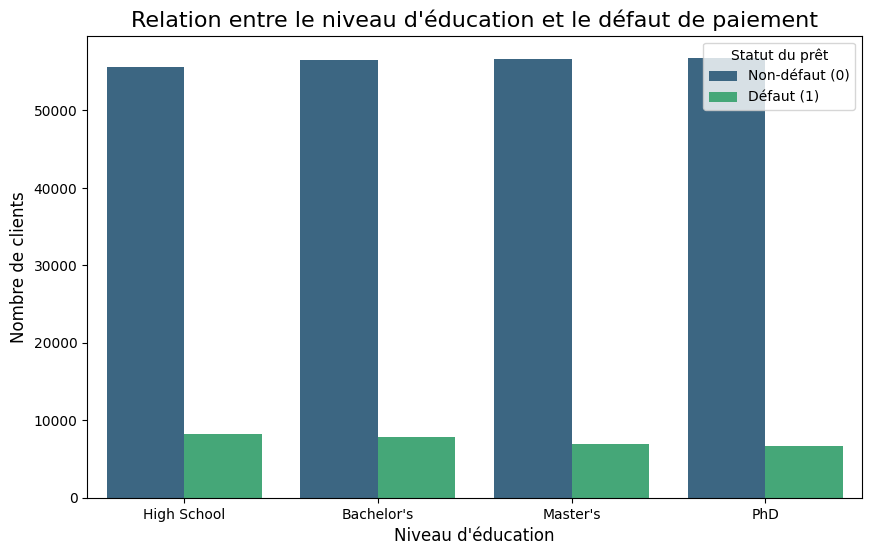

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Définir l'ordre des niveaux d'éducation pour une meilleure lisibilité du graphique
education_order = ["High School", "Bachelor's", "Master's", "PhD"]

# Créer un graphique à barres groupées
# Le paramètre 'hue' permet de séparer les barres pour chaque modalité de 'Default'
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Default', data=df, order=education_order, palette='viridis')

# Ajouter un titre et des étiquettes aux axes
plt.title('Relation entre le niveau d\'éducation et le défaut de paiement', fontsize=16)
plt.xlabel('Niveau d\'éducation', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)

# Personnaliser la légende
plt.legend(title='Statut du prêt', labels=['Non-défaut (0)', 'Défaut (1)'])

# Afficher le graphique
plt.show()

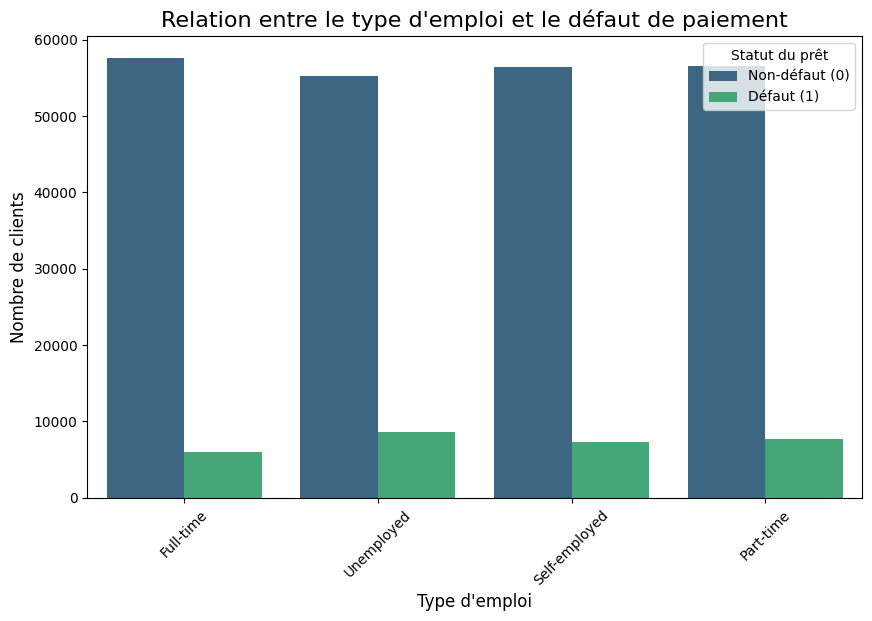

In [ ]:
# Créer un graphique à barres groupées avec Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='EmploymentType', hue='Default', data=df, palette='viridis')

# Ajouter un titre et des étiquettes pour plus de clarté
plt.title('Relation entre le type d\'emploi et le défaut de paiement', fontsize=16)
plt.xlabel('Type d\'emploi', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)
plt.xticks(rotation=45) # Rotation des étiquettes pour éviter les chevauchements

# Personnaliser la légende
plt.legend(title='Statut du prêt', labels=['Non-défaut (0)', 'Défaut (1)'])

# Afficher le graphique
plt.show()

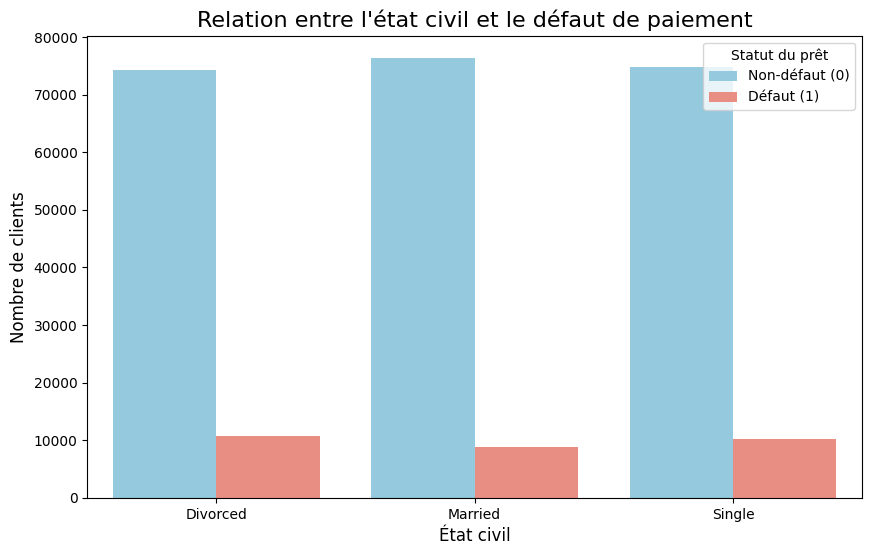

In [ ]:
# Définir la palette de couleurs
palette = {0: 'skyblue', 1: 'salmon'}

# Créer le graphique en barres groupées
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Default', data=df, palette=palette)

# Ajouter des titres et des étiquettes pour la lisibilité
plt.title('Relation entre l\'état civil et le défaut de paiement', fontsize=16)
plt.xlabel('État civil', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)

# Personnaliser la légende
plt.legend(title='Statut du prêt', labels=['Non-défaut (0)', 'Défaut (1)'])

# Afficher le graphique
plt.show()

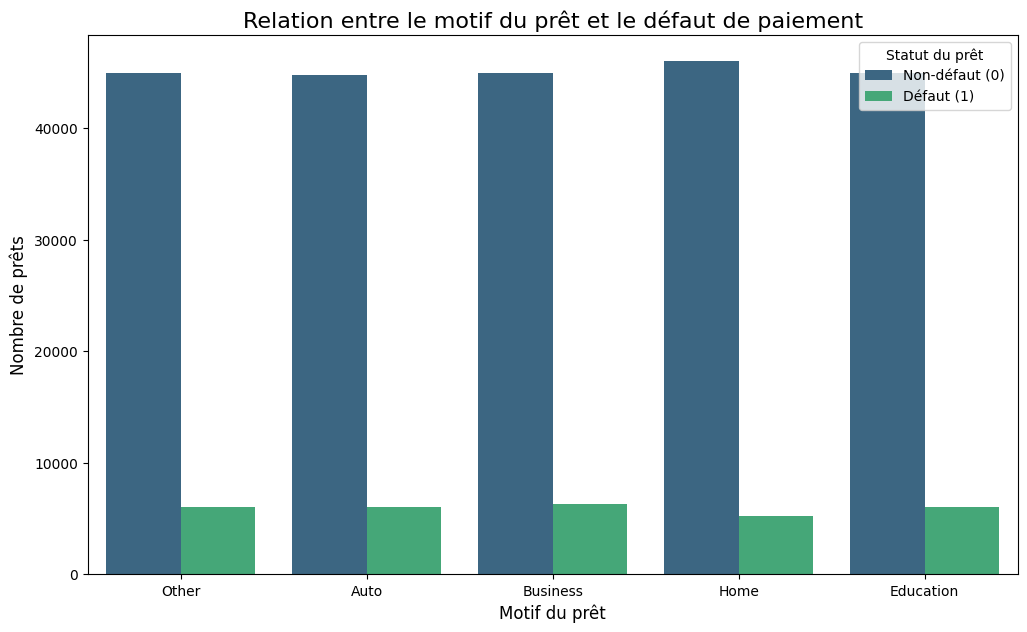

In [ ]:
# Créer un graphique à barres groupées
# Le paramètre 'hue' sépare les barres pour chaque modalité de 'Default'
plt.figure(figsize=(12, 7))
sns.countplot(x='LoanPurpose', hue='Default', data=df, palette='viridis')

# Ajouter un titre et des étiquettes aux axes pour une meilleure lisibilité
plt.title('Relation entre le motif du prêt et le défaut de paiement', fontsize=16)
plt.xlabel('Motif du prêt', fontsize=12)
plt.ylabel('Nombre de prêts', fontsize=12)

# Personnaliser la légende
plt.legend(title='Statut du prêt', labels=['Non-défaut (0)', 'Défaut (1)'])

# Afficher le graphique
plt.show()

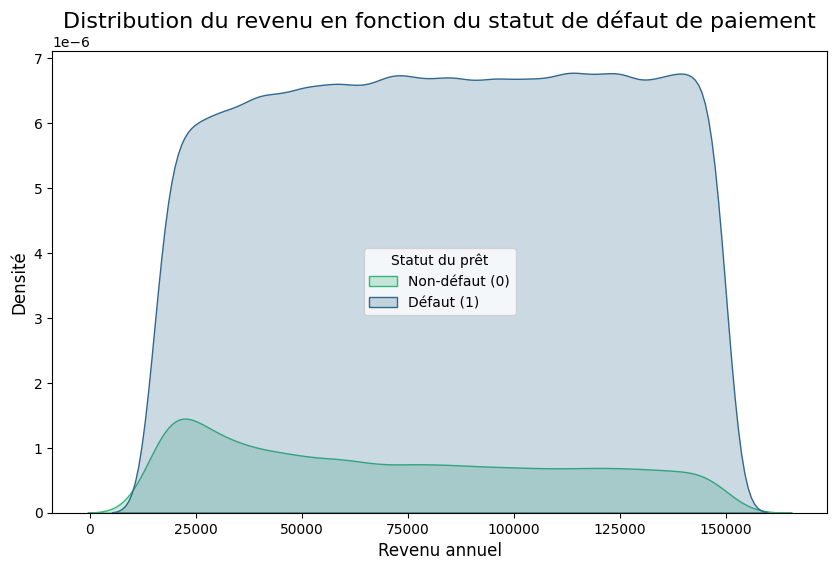

In [ ]:
# Créer un graphique de densité (KDE plot) pour 'Income', séparé par 'Default'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Income', hue='Default', fill=True, palette='viridis')

# Ajouter un titre et des étiquettes aux axes
plt.title('Distribution du revenu en fonction du statut de défaut de paiement', fontsize=16)
plt.xlabel('Revenu annuel', fontsize=12)
plt.ylabel('Densité', fontsize=12)

# Personnaliser la légende pour la rendre plus lisible
plt.legend(title='Statut du prêt', labels=['Non-défaut (0)', 'Défaut (1)'])

# Afficher le graphique
plt.show()

/tmp/ipython-input-1954943237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Default', y='LoanAmount', data=df, palette='muted')


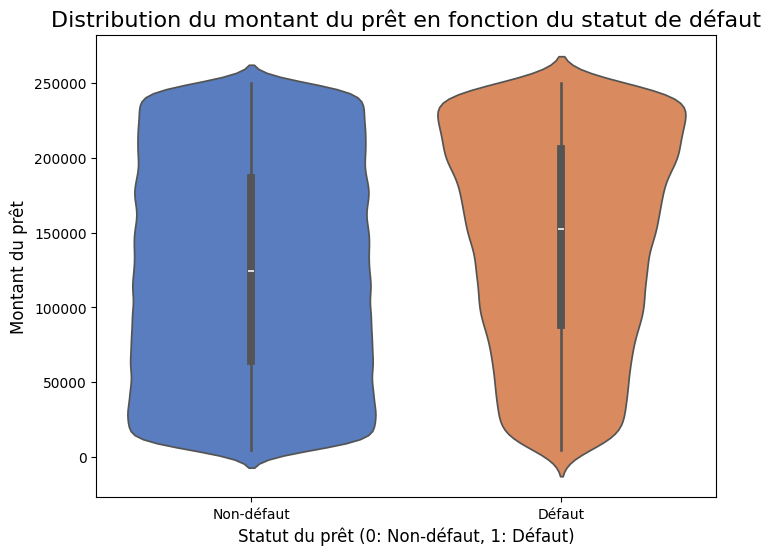

In [ ]:
# Créer un diagramme en violon pour comparer la distribution de LoanAmount par statut de défaut
plt.figure(figsize=(8, 6))
sns.violinplot(x='Default', y='LoanAmount', data=df, palette='muted')

# Ajouter un titre et des étiquettes pour une meilleure lisibilité
plt.title('Distribution du montant du prêt en fonction du statut de défaut', fontsize=16)
plt.xlabel('Statut du prêt (0: Non-défaut, 1: Défaut)', fontsize=12)
plt.ylabel('Montant du prêt', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-défaut', 'Défaut'])

# Afficher le graphique
plt.show()

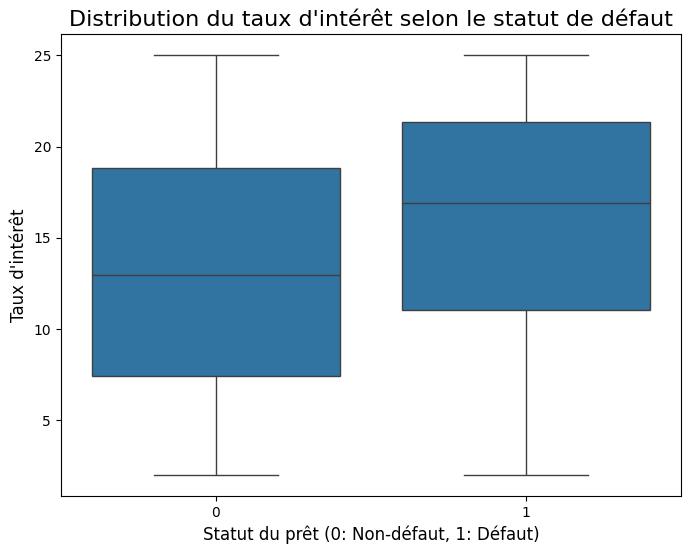

In [ ]:
# Créer un diagramme en boîte
plt.figure(figsize=(8, 6))
sns.boxplot(x='Default', y='InterestRate', data=df)

# Ajouter des titres et des étiquettes pour plus de clarté
plt.title('Distribution du taux d\'intérêt selon le statut de défaut', fontsize=16)
plt.xlabel('Statut du prêt (0: Non-défaut, 1: Défaut)', fontsize=12)
plt.ylabel('Taux d\'intérêt', fontsize=12)

# Afficher le graphique
plt.show()

#### Transformation des variables de type object en variables numériques

In [ ]:
# Transformation de la variable Education

     # Vérification du nombre de modalités de Education
education_counts = df['Education'].value_counts()

print(education_counts)

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64


In [ ]:
      # Définion du mappage pour le codage de la variable Education
education_mapping = {
    "High School": 0,
    "Bachelor's": 1,
    "Master's": 2,
    "PhD": 3
}

      # Application du mappage à la colonne
df['Education_encoded'] = df['Education'].map(education_mapping)

In [ ]:
# Vérification des modalités des colonnes EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner

In [ ]:
      # Modalités de EmploymentType
employment_counts = df['EmploymentType'].value_counts()

print(employment_counts)

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64


In [ ]:
      # Modalités de MaritalStatus
MaritalStatus_counts = df['MaritalStatus'].value_counts()

print(MaritalStatus_counts)

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64


In [ ]:
      # Modalités de HasMortgage
HasMortgage_counts = df['HasMortgage'].value_counts()

print(HasMortgage_counts)

HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64


In [ ]:
      # Modalités de HasDependents
HasDependents_counts = df['HasDependents'].value_counts()

print(HasDependents_counts)

HasDependents
Yes    127742
No     127605
Name: count, dtype: int64


In [ ]:
       # Modalités de LoanPurpose
LoanPurpose_counts = df['LoanPurpose'].value_counts()

print(LoanPurpose_counts)

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64


In [ ]:
       # Modalités de HasCoSigner
HasCoSigner_counts = df['HasCoSigner'].value_counts()

print(HasCoSigner_counts)

HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64


In [ ]:
# Transformation des colonnes EmploymentType, MaritalStatus, HasMortgage, HasDependents, LoanPurpose, HasCoSigner

      # Sélection des variables catégorielles à transformer
categorical_cols = ['EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

      # Création d'un DataFrame contenant UNIQUEMENT les variables dummies
      # La fonction pd.get_dummies() pour génèrer des variables binaires (True/False ou 0/1)
dummies = pd.get_dummies(df[categorical_cols], columns=categorical_cols)

      # Convertion des variables dummies en entiers (0 et 1)
dummies = dummies.astype(int)

      # Suppression des colonnes catégorielles d'origine du DataFrame initial
 #df = df.drop(columns=categorical_cols) # This line was causing the error

      # Fusion du DataFrame original avec les nouvelles variables dummies
df_final = pd.concat([df, dummies], axis=1)

      # Affichage les 5 premières lignes du DataFrame final
print("DataFrame avec dummies ajoutées et converties en entiers :")
df_final.head()

DataFrame avec dummies ajoutées et converties en entiers :


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,1,0,1,0,0,0,0,1,0,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0,1,0,0,0,0,0,1,0,1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,1,0,1,1,0,0,0,0,1,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,1,0,0,1,0,0,0,1,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
df_final = df_final.drop(['EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'],axis=1)

In [ ]:
df_final = df_final.drop(['LoanID','Education'], axis=1)

In [ ]:
df_final.shape

(255347, 29)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  int64  
 1   Income                        255347 non-null  int64  
 2   LoanAmount                    255347 non-null  int64  
 3   CreditScore                   255347 non-null  int64  
 4   MonthsEmployed                255347 non-null  int64  
 5   NumCreditLines                255347 non-null  int64  
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  int64  
 8   DTIRatio                      255347 non-null  float64
 9   Default                       255347 non-null  int64  
 10  Education_encoded             255347 non-null  int64  
 11  EmploymentType_Full-time      255347 non-null  int64  
 12  EmploymentType_Part-time      255347 non-nul

## 4.Definition et paramétrage du model

In [ ]:
column_target = "Default"
columns_features = [c for c in df_final.columns if c!=column_target]

features = np.array(df_final[columns_features])
target = np.array(df_final[column_target], dtype="int64")

In [ ]:
features.shape

(255347, 28)

In [ ]:
target.shape

(255347,)

In [ ]:
n_train = int(len(features)*0.8)
n_train

204277

In [ ]:
train_features = features[:n_train]
train_target = target[:n_train]

val_features = features[n_train:]
val_target = target[n_train:]

In [ ]:
len(val_target)

51070

In [ ]:
np.sum(train_target)

np.int64(23746)

In [ ]:
np.sum(train_target)/len(train_target)

np.float64(0.11624411950439843)

In [ ]:
np.sum(val_target)/len(val_target)

np.float64(0.11566477383982769)

Il n'y a pas un écart entre le pourcentage de cas de défaut de paiement dans le jeu de données d'entrainement et de validation. Les deux données suivent presque la même distribution.

In [ ]:
n_pos = np.sum(train_target == 1)
n_neg = np.sum(train_target == 0)

weight_for_0 = 1/(n_neg)
weight_for_1 = 1/(n_pos)

(weight_for_0, weight_for_1)

(np.float64(5.539214871684087e-06), np.float64(4.21123557651815e-05))

### Normalisation des données

In [ ]:
mean = np.mean(train_features, axis=0)
mean

array([4.34694655e+01, 8.24975315e+04, 1.27438475e+05, 5.74453022e+02,
       5.95609834e+01, 2.50064863e+00, 1.34917090e+01, 3.60503434e+01,
       5.00033582e-01, 1.49698693e+00, 2.49093143e-01, 2.51134489e-01,
       2.50238647e-01, 2.49533721e-01, 3.33576467e-01, 3.33126098e-01,
       3.33297434e-01, 4.99620613e-01, 5.00379387e-01, 4.99929018e-01,
       5.00070982e-01, 1.99782648e-01, 2.00947733e-01, 1.99493825e-01,
       2.00179168e-01, 1.99596626e-01, 4.99596137e-01, 5.00403863e-01])

In [ ]:
train_features = train_features-mean
val_features = val_features-mean

In [ ]:
std = np.std(train_features, axis=0)
train_features = train_features/std
val_features = val_features/std

In [ ]:
train_features

array([[ 0.83631167,  0.08969839, -1.08507446, ...,  2.00252459,
        -0.9991926 ,  0.9991926 ],
       [ 1.70395636, -0.82260901, -0.0423358 , ...,  2.00252459,
        -0.9991926 ,  0.9991926 ],
       [ 0.16889268,  0.04388035,  0.02470173, ..., -0.49936965,
         1.00080805, -1.00080805],
       ...,
       [ 1.50373066, -1.72503962,  1.55075167, ..., -0.49936965,
         1.00080805, -1.00080805],
       [-1.49965479, -0.61101485,  1.31617676, ..., -0.49936965,
         1.00080805, -1.00080805],
       [-1.0992034 , -1.21434553,  1.12933858, ..., -0.49936965,
        -0.9991926 ,  0.9991926 ]])

In [ ]:
train_features.shape

(204277, 28)

In [ ]:
train_features.shape[1:]

(28,)

### Modèle théorique

In [ ]:
import keras
from keras.layers import Dense

model = keras.Sequential([
    keras.Input(shape=train_features.shape[1:]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,265 (544.00 KB)

 Trainable params: 139,265 (544.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
metrics = [
  keras.metrics.Precision(name="precision"),
  keras.metrics.Recall(name="recall"),

]

model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.017),
  loss="binary_crossentropy",
  metrics=metrics
)


## 5.Model training et résultats

In [ ]:
class_weight = {0: weight_for_0, 1: weight_for_1}

history = model.fit(
  train_features,
  train_target,
  batch_size=3000,
  epochs=30,
  verbose=2,
  validation_data=(val_features, val_target),
  class_weight=class_weight
)

Epoch 1/30
69/69 - 7s - 106ms/step - loss: 4.6774e-06 - precision: 0.2532 - recall: 0.8530 - val_loss: 0.5854 - val_precision: 0.1953 - val_recall: 0.6905
Epoch 2/30
69/69 - 4s - 59ms/step - loss: 4.5341e-06 - precision: 0.2620 - recall: 0.8627 - val_loss: 0.5902 - val_precision: 0.1961 - val_recall: 0.6829
Epoch 3/30
69/69 - 5s - 76ms/step - loss: 4.4519e-06 - precision: 0.2658 - recall: 0.8717 - val_loss: 0.5892 - val_precision: 0.1970 - val_recall: 0.6816
Epoch 4/30
69/69 - 5s - 72ms/step - loss: 4.4040e-06 - precision: 0.2683 - recall: 0.8758 - val_loss: 0.5999 - val_precision: 0.1963 - val_recall: 0.6768
Epoch 5/30
69/69 - 6s - 83ms/step - loss: 4.3581e-06 - precision: 0.2702 - recall: 0.8804 - val_loss: 0.6125 - val_precision: 0.1946 - val_recall: 0.6868
Epoch 6/30
69/69 - 3s - 50ms/step - loss: 4.3447e-06 - precision: 0.2698 - recall: 0.8845 - val_loss: 0.6089 - val_precision: 0.1962 - val_recall: 0.6772
Epoch 7/30
69/69 - 3s - 49ms/step - loss: 4.3161e-06 - precision: 0.2707 - 

In [ ]:
history.history

{'loss': [5.33944239577977e-06,
  5.359569058782654e-06,
  5.404988314694492e-06,
  5.405432148108957e-06,
  5.397939730755752e-06,
  5.402225724537857e-06,
  5.3880162340647075e-06,
  5.374468855734449e-06,
  5.35974140802864e-06,
  5.3513158491114154e-06,
  5.331774445949122e-06,
  5.300554221321363e-06,
  5.307475476001855e-06,
  5.265900654194411e-06,
  5.245240117801586e-06,
  5.219081231189193e-06,
  5.2061909627809655e-06,
  5.187148872209946e-06,
  5.16397403771407e-06,
  5.126919859321788e-06,
  5.1171928134863265e-06,
  5.09966594108846e-06,
  5.082956704427488e-06,
  5.0552707762108184e-06,
  5.0380249376758e-06,
  5.021270226279739e-06,
  4.988597083865898e-06,
  4.967187123838812e-06,
  4.9425166253058705e-06,
  4.919342700304696e-06],
 'precision': [0.23790962994098663,
  0.23355993628501892,
  0.23166625201702118,
  0.2334802895784378,
  0.23159144818782806,
  0.23022711277008057,
  0.2307721972465515,
  0.23029924929141998,
  0.2307211309671402,
  0.2296733409166336,
  

Max val_recall 0.7477568984031677


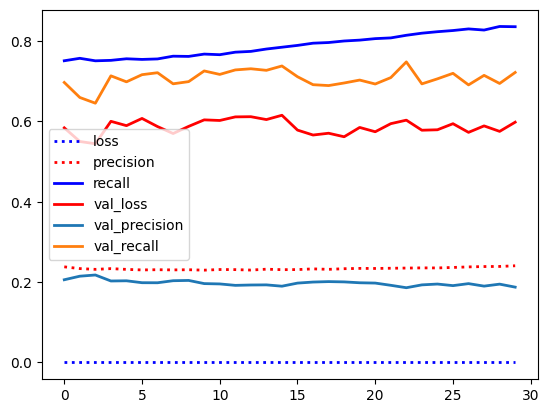

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(lw=2, style=['b:','r:','b-','r-']);
print("Max val_recall",np.max(history.history["val_recall"]))

##  6. Inférence dans le Model

In [ ]:
val_pred = model.predict(val_features)

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [ ]:
val_pred

array([[0.1856425 ],
       [0.01693742],
       [0.00669105],
       ...,
       [0.00768669],
       [0.06633178],
       [0.0066383 ]], dtype=float32)

In [ ]:
val_pred[:,0]>0.5

array([False, False, False, ..., False, False, False])

In [ ]:
(val_pred[:,0]>0.5).mean()

np.float64(0.02281182690424907)

## Bibliographie

Alvarez, F., Argente, D., & Van Patten, D. (2021). *Are Cryptocurrencies Currencies? Manna from Heaven or Toxic Pollution?* (No. w29356). National Bureau of Economic Research.

Altman, E. I. (1968). Financial ratios, discriminant analysis and the prediction of corporate bankruptcy. *The Journal of Finance, 23*(4), 589-609.

Bazarbash, M. (2019). *FinTech in financial inclusion: Machine learning applications in assessing credit risk*. International Monetary Fund.

Becker, G. S. (1968). Crime and punishment: An economic approach. *Journal of Political Economy, 76*(2), 169-217.

Berg, T., Burg, V., Gombović, A., & Puri, M. (2020). On the rise of fintechs: Credit scoring using digital footprints. *The Review of Financial Studies, 33*(7), 2845-2897.

Chen, M. X., Wu, S., & Yang, B. (2023). How valuable is FinTech innovation? *The Review of Financial Studies, 36*(2), 633-677.

D'Acunto, F., Prabhala, N., & Rossi, A. G. (2022). The promises and pitfalls of robo-advising. *The Review of Financial Studies, 35*(7), 3178-3220.

Djankov, S., McLiesh, C., & Shleifer, A. (2007). Private credit in 129 countries. *Journal of Financial Economics, 84*(2), 299-329.